In [1]:
# Zeige Plot in Notebook
%matplotlib inline
# Importiere Bibliotheken
import os
import re
import urllib
import numpy as np
import pandas as pd
import nltk
from langdetect import detect
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
# Kodierte und vorhergesagte Daten einlesen
data_labeled = pd.read_pickle('data_modified/tweets_labeled.pkl')
data_predicted = pd.read_pickle('data_modified/tweets_predicted.pkl')
# Daten zusammensetzen
data_full = pd.concat([data_labeled['2017-10-01':'2018-03-04'], data_predicted['2017-10-01':'2018-03-04']], sort=False)
data_full.head()

,User,Tweet,Retweet,RT_from,Orig_Tweet,Tweet_Participants,Reply,Text,Tags,Lang,Link,Label
Datetime,,,,,,,,,,,,
2018-01-18 17:07:00,@GeroldSchlegel,RT @redder66: @NatalieRickli @NoBillag Die Unt...,True,@redder66,False,"[@NatalieRickli, @NoBillag, @SVPch]",False,Die Unterstützung der für die #NoBillag ergibt...,"[NoBillag, NeinzuNoBillag]",de,[],1
2017-12-23 13:53:00,@derlamentierer,@ProBillag auch sie haben das konzept von soli...,False,NaN,False,[@ProBillag],True,auch sie haben das konzept von solidarität nic...,"[nobillag, jazunobillag, NeinzuNoBillag]",de,[https://t.co/iFLeHBuSFS],6
2017-12-05 19:47:00,@FlorianSchwab,RT @VitalSteiner: Was die Gegner von #NoBillag...,True,@VitalSteiner,False,[],False,Was die Gegner von #NoBillag mit solchen Bilde...,[NoBillag],de,[https://t.co/IKOSeftUlm],6
2018-01-17 07:08:00,@Schweizer2018,RT @realDanielVozar: Wenn #NoBillag abgelehnt ...,True,@realDanielVozar,False,[@LHeimgartner],False,"Wenn #NoBillag abgelehnt wird, wird sich gar n...","[NoBillag, JazuNoBillag]",de,[],5
2018-02-19 09:52:00,@PilgramsWords,RT @_macmike: #StarkesStück https://t.co/2L7uG...,True,@_macmike,False,"[@Blickch, @20min, @bazonline]",False,#StarkesStück #AfD #SVP #ARD #ZDF #ORF #SRF #...,"[StarkesStück, AfD, SVP, ARD, ZDF, ORF, SRF, s...",de,"[https://t.co/2L7uGmmVH0, https://t.co/5Wf6qJ1...",0


In [34]:
# CSV mit Journaliste-Accounts einlesen und anschauen
journalists = pd.read_csv('data_input/journalists_accounts.csv')
journalists.head()
data_full['Media'] = data_full.User.isin(journalists['Twitter-Username']).astype(int)
data_full.User[data_full.Media == 1]

Datetime
2018-01-28 14:10:00      @KatharinaBart
2017-12-15 18:14:00       @matthiasdaum
2017-12-15 12:01:00                @NZZ
2017-12-21 20:58:00        @broennimann
2017-11-26 21:48:00            @krick68
2018-01-07 23:02:00         @sennhauser
2018-01-15 14:23:00            @rocwint
2017-11-29 09:41:00            @krick68
2018-01-28 13:40:00      @KatharinaBart
2017-12-08 09:11:00              @NZZaS
2017-12-17 09:19:00     @AndreasMoeckli
2017-12-12 14:18:00      @tamarasteffen
2018-02-04 10:43:00            @krick68
2018-02-09 11:40:00        @nick_luethi
2017-12-04 13:45:00        @nick_luethi
2018-02-14 08:50:00                @NZZ
2017-12-23 22:23:00    @matthiashalbeis
2017-11-06 15:09:00       @oswaldmartin
2017-12-29 13:45:00            @krick68
2018-01-30 18:23:00           @asautter
2017-12-16 13:22:00        @hansi_voigt
2017-10-22 13:37:00             @a_jahn
2017-11-06 14:33:00          @svenzaugg
2017-10-26 18:11:00           @ThBenkoe
2018-02-03 22:17:00            

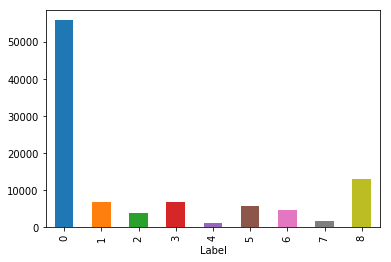

In [5]:
# Verteilung der Labels visualisieren
data_full.groupby(['Label']).count()['User'].plot.bar()

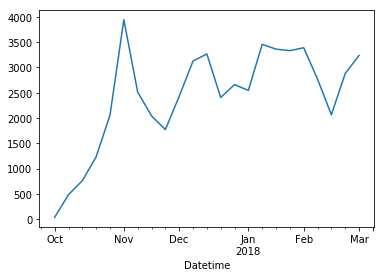

In [145]:
# Nutzung von Label 0 (11) über die Zeit
data_full.Label[data_full.Label == '0'].resample('W').count().plot()

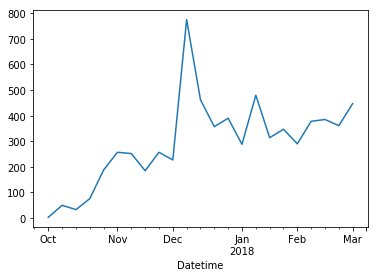

In [146]:
# Nutzung von Label 1 über die Zeit
data_full.Label[data_full.Label == '1'].resample('W').count().plot()

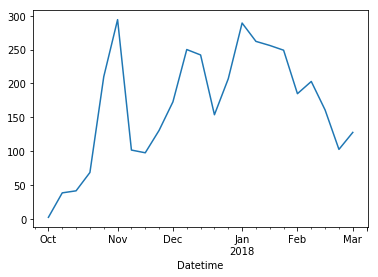

In [42]:
# Nutzung von Label 2 über die Zeit
data_full.Label[data_full.Label == '2'].resample('W').count().plot()

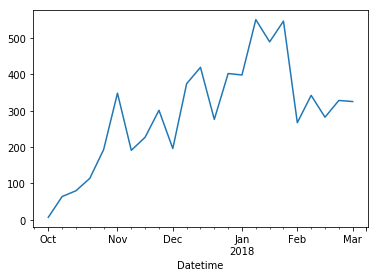

In [43]:
# Nutzung von Label 3 über die Zeit
data_full.Label[data_full.Label == '3'].resample('W').count().plot()

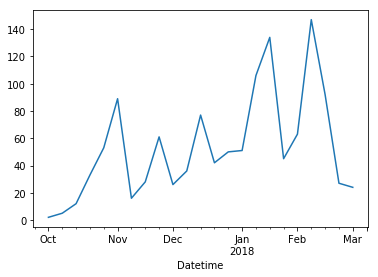

In [44]:
# Nutzung von Label 4 über die Zeit
data_full.Label[data_full.Label == '4'].resample('W').count().plot()

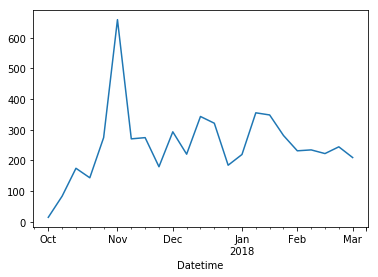

In [45]:
# Nutzung von Label 5 über die Zeit
data_full.Label[data_full.Label == '5'].resample('W').count().plot()

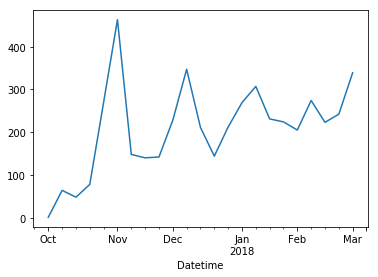

In [46]:
# Nutzung von Label 6 über die Zeit
data_full.Label[data_full.Label == '6'].resample('W').count().plot()

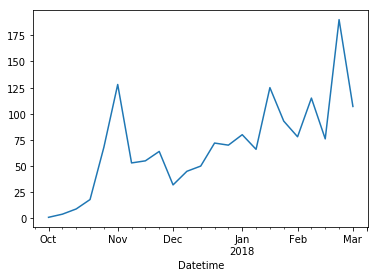

In [47]:
# Nutzung von Label 7 (12) über die Zeit
data_full.Label[data_full.Label == '7'].resample('W').count().plot()

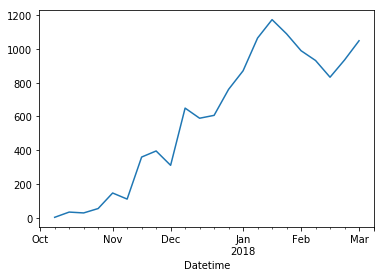

In [48]:
# Nutzung von Label 8 (13) über die Zeit
data_full.Label[data_full.Label == '8'].resample('W').count().plot()

In [49]:
# Anzahl von Tweets von Journalisten / Medien mit Label 1 pro Woche
data_full.Label[(data_full.Label == '1') & (data_full.Media == 1)].resample('W').count()

Datetime
2017-10-22     3
2017-10-29     2
2017-11-05     2
2017-11-12     3
2017-11-19     7
2017-11-26     7
2017-12-03     2
2017-12-10    10
2017-12-17    10
2017-12-24     4
2017-12-31     8
2018-01-07     1
2018-01-14     9
2018-01-21     2
2018-01-28     5
2018-02-04     7
2018-02-11     6
2018-02-18     3
2018-02-25     0
2018-03-04     1
Freq: W-SUN, Name: Label, dtype: int64

In [50]:
data_full.head()

,User,Tweet,Retweet,RT_from,Orig_Tweet,Tweet_Participants,Reply,Text,Tags,Lang,Link,Label,Media
Datetime,,,,,,,,,,,,,
2018-01-18 17:07:00,@GeroldSchlegel,RT @redder66: @NatalieRickli @NoBillag Die Unt...,True,@redder66,False,"[@NatalieRickli, @NoBillag, @SVPch]",False,Die Unterstützung der für die #NoBillag ergibt...,"[NoBillag, NeinzuNoBillag]",de,[],1,0
2017-12-23 13:53:00,@derlamentierer,@ProBillag auch sie haben das konzept von soli...,False,NaN,False,[@ProBillag],True,auch sie haben das konzept von solidarität nic...,"[nobillag, jazunobillag, NeinzuNoBillag]",de,[https://t.co/iFLeHBuSFS],6,0
2017-12-05 19:47:00,@FlorianSchwab,RT @VitalSteiner: Was die Gegner von #NoBillag...,True,@VitalSteiner,False,[],False,Was die Gegner von #NoBillag mit solchen Bilde...,[NoBillag],de,[https://t.co/IKOSeftUlm],6,0
2018-01-17 07:08:00,@Schweizer2018,RT @realDanielVozar: Wenn #NoBillag abgelehnt ...,True,@realDanielVozar,False,[@LHeimgartner],False,"Wenn #NoBillag abgelehnt wird, wird sich gar n...","[NoBillag, JazuNoBillag]",de,[],5,0
2018-02-19 09:52:00,@PilgramsWords,RT @_macmike: #StarkesStück https://t.co/2L7uG...,True,@_macmike,False,"[@Blickch, @20min, @bazonline]",False,#StarkesStück #AfD #SVP #ARD #ZDF #ORF #SRF #...,"[StarkesStück, AfD, SVP, ARD, ZDF, ORF, SRF, s...",de,"[https://t.co/2L7uGmmVH0, https://t.co/5Wf6qJ1...",0,0


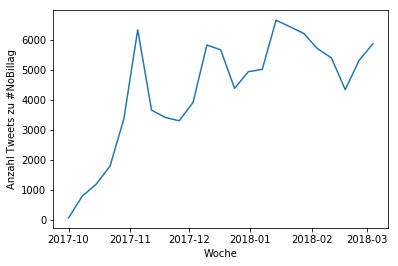

In [36]:
# Verteilung aller Tweet über die Zeit anschauen
plt.plot(data_full.Label.resample('W').count(), label="Alle Tweets zu No Billag")
plt.xlabel("Woche")
plt.ylabel("Anzahl Tweets zu #NoBillag")
plt.savefig("data_output/Tweets_All.png", dpi=300)

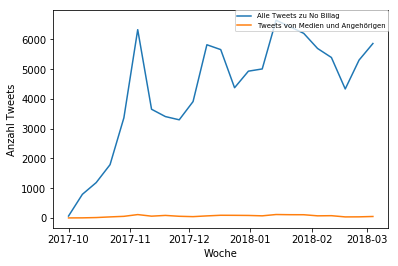

In [38]:
# Verteilung aller Tweet über die Zeit anschauen (Medien getrennt)
plt.plot(data_full.Label.resample('W').count(), label="Alle Tweets zu No Billag")
plt.plot(data_full.Label[data_full.Media == 1].resample('W').count(), label="Tweets von Medien und Angehörigen")
plt.legend(loc=1, borderaxespad=0., fontsize='x-small')
plt.xlabel("Woche")
plt.ylabel("Anzahl Tweets")
plt.savefig("data_output/Tweets_Media_All.png", dpi=300)

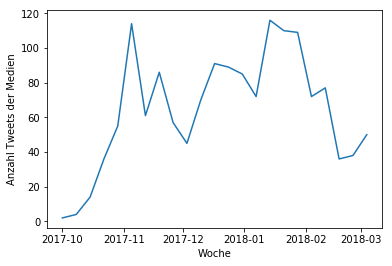

In [39]:
# Verteilung der Tweets von Medienaccounts über die Zeit anschauen
plt.plot(data_full.Label[data_full.Media == 1].resample('W').count(), label="Tweets von Medien und Angehörigen")
plt.xlabel("Woche")
plt.ylabel("Anzahl Tweets der Medien")
plt.savefig("data_output/Tweets_Media.png", dpi=300)

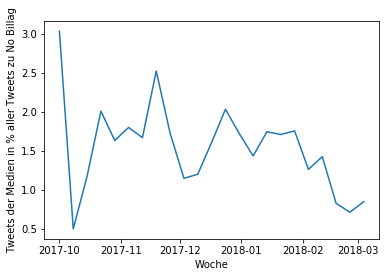

In [40]:
# Anteile der Tweets von Medienaccounts über die Zeit anschauen
plt.plot((data_full.Label[data_full.Media == 1].resample('W').count())/(data_full.Label.resample('W').count())*100)
plt.xlabel("Woche")
plt.ylabel("Tweets der Medien in % aller Tweets zu No Billag")
plt.savefig("data_output/Tweets_Media_percentage.png", dpi=300)

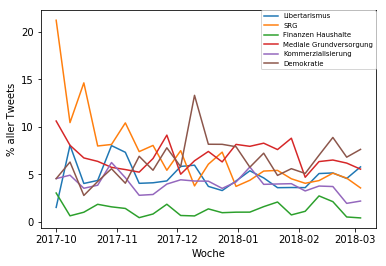

In [41]:
# Verteilung der Frames pro Woche
plt.plot((data_full.Label[data_full.Label == '6'].resample('W').count())/(data_full.Label.resample('W').count())*100, label="Libertarismus")
plt.plot((data_full.Label[data_full.Label == '5'].resample('W').count())/(data_full.Label.resample('W').count())*100, label="SRG")
plt.plot((data_full.Label[data_full.Label == '4'].resample('W').count())/(data_full.Label.resample('W').count())*100, label="Finanzen Haushalte")
plt.plot((data_full.Label[data_full.Label == '3'].resample('W').count())/(data_full.Label.resample('W').count())*100, label="Mediale Grundversorgung")
plt.plot((data_full.Label[data_full.Label == '2'].resample('W').count())/(data_full.Label.resample('W').count())*100, label="Kommerzialisierung")
plt.plot((data_full.Label[data_full.Label == '1'].resample('W').count())/(data_full.Label.resample('W').count())*100, label="Demokratie")
# Legende erstellen
plt.legend(loc=1, borderaxespad=0., fontsize='x-small')
plt.xlabel("Woche")
plt.ylabel("% aller Tweets")
plt.savefig("data_output/Frames_percent_W.png", dpi=300)

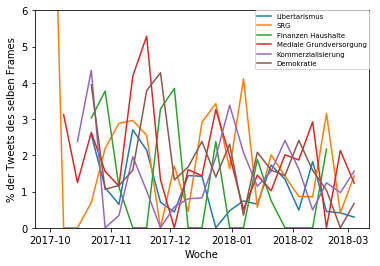

In [42]:
# Verteilung der genutzten Frames von Medien pro Woche
plt.plot((data_full.Label[(data_full.Label == '6')&(data_full.Media == 1)].resample('W').count())/(data_full.Label[data_full.Label == '6'].resample('W').count())*100, label="Libertarismus")
plt.plot((data_full.Label[(data_full.Label == '5')&(data_full.Media == 1)].resample('W').count())/(data_full.Label[data_full.Label == '5'].resample('W').count())*100, label="SRG")
plt.plot((data_full.Label[(data_full.Label == '4')&(data_full.Media == 1)].resample('W').count())/(data_full.Label[data_full.Label == '4'].resample('W').count())*100, label="Finanzen Haushalte")
plt.plot((data_full.Label[(data_full.Label == '3')&(data_full.Media == 1)].resample('W').count())/(data_full.Label[data_full.Label == '3'].resample('W').count())*100, label="Mediale Grundversorgung")
plt.plot((data_full.Label[(data_full.Label == '2')&(data_full.Media == 1)].resample('W').count())/(data_full.Label[data_full.Label == '2'].resample('W').count())*100, label="Kommerzialisierung")
plt.plot((data_full.Label[(data_full.Label == '1')&(data_full.Media == 1)].resample('W').count())/(data_full.Label[data_full.Label == '1'].resample('W').count())*100, label="Demokratie")
# Legende erstellen
plt.legend(loc=1, borderaxespad=0., fontsize='x-small')
plt.xlabel("Woche")
plt.ylabel("% der Tweets des selben Frames")
plt.ylim(0, 6)
plt.savefig("data_output/Frames_percent_W_Media.png", dpi=300)

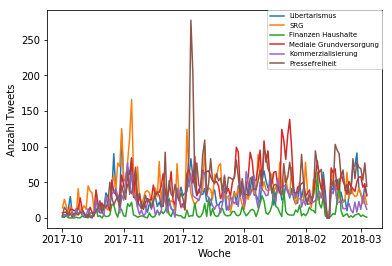

In [43]:
# Verteilung der Frames pro Tag
plt.plot(data_full.Label[data_full.Label == '6'].resample('D').count(), label="Libertarismus")
plt.plot(data_full.Label[data_full.Label == '5'].resample('D').count(), label="SRG")
plt.plot(data_full.Label[data_full.Label == '4'].resample('D').count(), label="Finanzen Haushalte")
plt.plot(data_full.Label[data_full.Label == '3'].resample('D').count(), label="Mediale Grundversorgung")
plt.plot(data_full.Label[data_full.Label == '2'].resample('D').count(), label="Kommerzialisierung")
plt.plot(data_full.Label[data_full.Label == '1'].resample('D').count(), label="Pressefreiheit")
# Legende erstellen
plt.legend(loc=1, borderaxespad=0., fontsize='x-small')
plt.xlabel("Woche")
plt.ylabel("Anzahl Tweets")
plt.savefig("data_output/Frames_D.png", dpi=300)

### Daten für Visualisierung in R vorbereiten und exportieren (für jeden Frame einzeln)

In [44]:
data_r = data_full[['Label','Media']]

In [45]:
data_r_1 = pd.DataFrame(data_r.Media[data_r.Label == '1'].resample('W').sum())
data_r_1['Count'] = pd.DataFrame(data_r.Media[data_r.Label == '1'].resample('W').count())
data_r_1['Percentage'] = data_r_1['Media']/data_r_1['Count']
data_r_1.reset_index().to_feather('data_modified/data_r_1.feather')

In [46]:
data_r_2 = pd.DataFrame(data_r.Media[data_r.Label == '2'].resample('W').sum())
data_r_2['Count'] = pd.DataFrame(data_r.Media[data_r.Label == '2'].resample('W').count())
data_r_2['Percentage'] = data_r_2['Media']/data_r_2['Count']
data_r_2.reset_index().to_feather('data_modified/data_r_2.feather')

In [47]:
data_r_3 = pd.DataFrame(data_r.Media[data_r.Label == '3'].resample('W').sum())
data_r_3['Count'] = pd.DataFrame(data_r.Media[data_r.Label == '3'].resample('W').count())
data_r_3['Percentage'] = data_r_3['Media']/data_r_3['Count']
data_r_3.reset_index().to_feather('data_modified/data_r_3.feather')

In [48]:
data_r_4 = pd.DataFrame(data_r.Media[data_r.Label == '4'].resample('W').sum())
data_r_4['Count'] = pd.DataFrame(data_r.Media[data_r.Label == '4'].resample('W').count())
data_r_4['Percentage'] = data_r_4['Media']/data_r_4['Count']
data_r_4.reset_index().to_feather('data_modified/data_r_4.feather')

In [49]:
data_r_5 = pd.DataFrame(data_r.Media[data_r.Label == '5'].resample('W').sum())
data_r_5['Count'] = pd.DataFrame(data_r.Media[data_r.Label == '5'].resample('W').count())
data_r_5['Percentage'] = data_r_5['Media']/data_r_5['Count']
data_r_5.reset_index().to_feather('data_modified/data_r_5.feather')

In [50]:
data_r_6 = pd.DataFrame(data_r.Media[data_r.Label == '6'].resample('W').sum())
data_r_6['Count'] = pd.DataFrame(data_r.Media[data_r.Label == '6'].resample('W').count())
data_r_6['Percentage'] = data_r_6['Media']/data_r_6['Count']
data_r_6.reset_index().to_feather('data_modified/data_r_6.feather')

### Finalen Datensatz abspeichern

In [56]:
# Frames anpassen
data_full.Label[data_full.Label == "1"] = "11"
data_full.Label[data_full.Label == "7"] = "12"
data_full.Label[data_full.Label == "8"] = "13"
# Datensatz abspeichern
data_full.to_pickle('data_output/NoBillagFrames_final.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
